# Virtual Environment and Requests Module

We start our lesson by:
1. Creating a virtual environment called **data_analysis** using the following command *conda create --name data_analysis python=3.10.9*
2. Activating the virtual environment we created by running the following command on terminal *source activate data_analysis*
3. Installing packages that we will use in our lesson i.e *pip install requests* installs the requests packages

## APIs and the Request Module

An **Aplication Programming interface**(API) is a set of functions and procedures that allow applications to access the features or data of an operating system ,application,or other service.

APIs allows us to interact with web pages and softwares of other developers

## Using the Request module

### sending a request

we will be requesting information from an API created by Github

In [2]:
#sending a request and logging the response
import requests
r = requests.get("https://api.github.com/users/Connor-SM")
print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


### Accessing the response data

To access the response data(content) we have to use the **content** attribute within our requests object

In [6]:
import requests
r = requests.get("https://api.github.com/users/Connor-SM")
data = r.content
print(data)

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.c

In the above code we got a byte string output with lots of brackets and information which is difficult to read

Responses from APIs are generally sent in ***JavaScript Object Notation***(*JSON*) formatting.    This is equivalent to a python dictionary and is the default format to send data via a request

### Converting the Response from a json file into a python dictionary

We have to convert the data from json to a dictionary

Luckily, the requests object comes with a built-in JSON conversion method called **json()**. This will enable us to convert the data into a dictionary and output data in key-value pairs

In [7]:
import requests
r = requests.get("https://api.github.com/users/Connor-SM")
#conveting data from a string to a dictionary
data = r.json()
for key,value in data.items():
    print(f"Key:{key}\tValue:{value}")
print(data["name"])

Key:login	Value:Connor-SM
Key:id	Value:20958711
Key:node_id	Value:MDQ6VXNlcjIwOTU4NzEx
Key:avatar_url	Value:https://avatars.githubusercontent.com/u/20958711?v=4
Key:gravatar_id	Value:
Key:url	Value:https://api.github.com/users/Connor-SM
Key:html_url	Value:https://github.com/Connor-SM
Key:followers_url	Value:https://api.github.com/users/Connor-SM/followers
Key:following_url	Value:https://api.github.com/users/Connor-SM/following{/other_user}
Key:gists_url	Value:https://api.github.com/users/Connor-SM/gists{/gist_id}
Key:starred_url	Value:https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key:subscriptions_url	Value:https://api.github.com/users/Connor-SM/subscriptions
Key:organizations_url	Value:https://api.github.com/users/Connor-SM/orgs
Key:repos_url	Value:https://api.github.com/users/Connor-SM/repos
Key:events_url	Value:https://api.github.com/users/Connor-SM/events{/privacy}
Key:received_events_url	Value:https://api.github.com/users/Connor-SM/received_events
Key:type	Value:Us

### Passing parameters

In our most APIs calls we will require extra information like parameters or headers.
This information is taken by API and used to perform specific task.

**For Example**
Lets perform a call this time while passing parameters in the url to search for python- specific repositories on Github 

In [20]:
import requests
r = requests.get("https://api.github.com/search/repositories?q=language:python")
#conveting data from a string to a dictionary
data = r.json()
print(data["total_count"])# output the total number of repositories that use python

9462119


In [21]:
import requests
r = requests.get("https://api.github.com/search/repositories?q=language:javascript")
data = r.json()
print(data["total_count"])

14608416


## Pandas

pandas is the ultimate tool when working with data. We can define it as a *flexible data analysis library built wuthin the C language, which is excellent for working with tabular data*

pandas is a mix of python and sql

NumPy is a fundamental package for scientific computing in Python.it uses multidimensional arrays and can perform calculations at a hihg rate

In [1]:
import pandas as pd
# creating a dataframe
import random
random.seed(3)# generate same random numbers every time
names = ["Jess","Jordan","Sandy","Ted","Barney","Tyler","Rebecca"]
ages = [random.randint(18,35) for x in range(len(names))]
# creating a dictionary
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


## Accessing Data

### Indexing by Column

Accesing data with a column is the same as acessing data in a dictionary with the key.

Within the first bracket you put the column name i.e *df(["ages"])*. 
    If you would like a specific record in that column you include it in the second bracketnwith the index i.e *df(["ages"][3])*
    
**Lets directly select a column in pandas**

In [2]:
import pandas as pd
# creating a dataframe
import random
random.seed(3)# generate same random numbers every time
names = ["Jess","Jordan","Sandy","Ted","Barney","Tyler","Rebecca"]
ages = [random.randint(18,35) for x in range(len(names))]
# creating a dictionary
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df["ages"])
print(df["ages"][3])

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


### Indexing by record

When we need to access an entire record , then we must use **loc** which allows us to specify the location via the index.

**lets demonstrate by an example**

In [1]:
import pandas as pd
# creating a dataframe
import random
random.seed(3)# generate same random numbers every time
names = ["Jess","Jordan","Sandy","Ted","Barney","Tyler","Rebecca"]
ages = [random.randint(18,35) for x in range(len(names))]
# creating a dictionary
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df.loc[0])
print(df.loc[0]["names"])

names    Jess
ages       25
Name: 0, dtype: object
Jess


When using **loc** you specify the index first, then you can specify the column name if you need a specific record

## Slicing a DataFrame

When we only need a specific number of records then we must slice the DataFrame.

Slicing in Pandas works the same way as a Python lists does, using a **start,stop and step** within a set of brackets.

**For example**

In [18]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df[2:5])
print("\nDisplaying in Reverse order")
print(df[::-1])
print("\nDisplaying the last element alone")
print(df[-1:])
print(df[:3])

            names  ages
2   Geofery Maina    23
3   Sharon Lukela    25
4  Sandra Mwarabu    19

Displaying in Reverse order
              names  ages
6     Joseph Thomas    25
5  Specioza Wanjiku    18
4    Sandra Mwarabu    19
3     Sharon Lukela    25
2     Geofery Maina    23
1       Sharif Agoi    20
0      Silas Angera    21

Displaying the last element alone
           names  ages
6  Joseph Thomas    25
           names  ages
0   Silas Angera    21
1    Sharif Agoi    20
2  Geofery Maina    23


## Built-in Methods

These are methods we use frequently to make our lives easier when using pandas.

### head()
Used to get the top records in the DataFrame ,along with the column name.

In [1]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
df.head(5)

,names,ages
0,Silas Angera,21
1,Sharif Agoi,20
2,Geofery Maina,23
3,Sharon Lukela,25
4,Sandra Mwarabu,19


### tail()
Used to get the bottom records from a DataFrame.

In [2]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
df.tail(3)

,names,ages
4,Sandra Mwarabu,19
5,Specioza Wanjiku,18
6,Joseph Thomas,25


### keys()
This is used to access the column headers

In [3]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
headers = df.keys()
print(headers)

Index(['names', 'ages'], dtype='object')


### .shape

This describes the number of records by the number of columns. important when we want to check and ensure that we are working with the proper amount of data

In [4]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
print(df.shape)

(7, 2)


### describe()

This method will give us numerical data.

we will be able to describe min,max,25%,50%,mean,etc, on all columns by just calling this method on the DataFrame.

In [5]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
df.describe()

,ages
count,7.000000
mean,21.571429
std,2.819997
min,18.000000
25%,19.500000
50%,21.000000
75%,24.000000
max,25.000000


### sort_values()

It is used when we want to sort a DataFrame based on column information.

You can pass in one or multiple values to be sorted by. When passing multiple columns, we must pass them as a list of names where the first name take precedence.

In [10]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
df = df.sort_values("ages")
df.head(3)

,names,ages
5,Specioza Wanjiku,18
4,Sandra Mwarabu,19
1,Sharif Agoi,20


## Filtration

### Conditionals

Rather than filtering out information, we can create a boolean datatype column that represents the condition we are checking.

Lets take our current DataFrame and write a condition that shows those who are 21 or older and acn drink

In [4]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
can_drink = df["ages"]>21
print(can_drink)

0    False
1    False
2     True
3     True
4    False
5    False
6     True
Name: ages, dtype: bool


### Subsetting

We can use this to filter out data but retain the information within the DataFrame.

In [5]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
df[df["ages"]>21]

,names,ages
2,Geofery Maina,23
3,Sharon Lukela,25
6,Joseph Thomas,25


We took the condition from above and wrapped it within brackets while accessing the *df* variable.

**syntax**
*dataframe_variable[conditional statement to filter records with]*

## Column Transformation

### Generating a new column with Data

To create a new column to the DataFrame, we will use the same syntax as if we were adding  a new key-value pair into a dictionary

In [6]:
import pandas as pd
import random
random.seed(3)
names = ["Silas Angera","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu","Specioza Wanjiku","Joseph Thomas"]
ages = [random.randint(18,25) for i in range(len(names))]
people = {"names" : names,"ages" : ages}
df = pd.DataFrame.from_dict(people)
#generating a new column of fake data for each record in the DataFrame to represent customer tenure
random.seed(321)
tenure = [random.randint(0,10) for x in range(len(df))]
df["tenure"] = tenure # adding the created column to the DataFrame
df.head()

,names,ages,tenure
0,Silas Angera,21,4
1,Sharif Agoi,20,6
2,Geofery Maina,23,2
3,Sharon Lukela,25,5
4,Sandra Mwarabu,19,8


### apply()

The process of adding new columns based on current data is known as **"Feature engineering"**.

This method helps us to anwser our own qustions from the DataFame

For example , in the DataFrame that we have we can try to answer a question like *What age group does each customer belong*

We can make the process easier by using the **apply** method

#### Steps
1. we will make a function that returns Teenager if age is less than 21 else adult
2. Add a colunm to the DataFrame by calling the Function using apply method 

In [7]:
def ageGroup(age):
    return "Teenager" if age<21 else "Adult"
#generating a new column of fake data for each record in the DataFrame to represent age groups
df["age_Group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_Group
0,Silas Angera,21,4,Adult
1,Sharif Agoi,20,6,Teenager
2,Geofery Maina,23,2,Adult
3,Sharon Lukela,25,5,Adult
4,Sandra Mwarabu,19,8,Teenager
5,Specioza Wanjiku,18,7,Teenager
6,Joseph Thomas,25,5,Adult


If we need to apply a value based on multiple columns, we must set the axis = 1

## Aggregations

Our objective is to extract actual insights and actionable conclutions from the data. This means reducing the data given to a summary of statistics via aggregation functions.

### groupby()

Used to condense the information to a summary

we need to use an aggregation function to let the compiler know how to group the information

For exapmle lets use **count**
#### 1. count()

In [33]:
df.groupby("age_Group", as_index = False).count().head()

,age_Group,names,ages,tenure
0,Adult,4,4,4
1,Teenager,3,3,3


#### 2. mean()

In [34]:
df.groupby("age_Group", as_index = False).mean().head()

/tmp/ipykernel_17263/935885208.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("age_Group", as_index = False).mean().head()


,age_Group,ages,tenure
0,Adult,23.5,4.0
1,Teenager,19.0,7.0


### groupby() with Multiple Columns

1. The arguement must be passed in as a list
2. The first item in the list will be the main column that the DataFrame is Grouped by

From our DataFrame lets check how many adults have a tenure of 5 years

In [8]:
df.groupby(["age_Group","tenure"], as_index = False).count().head()

,age_Group,tenure,names,ages
0,Adult,2,1,1
1,Adult,4,1,1
2,Adult,5,2,2
3,Teenager,6,1,1
4,Teenager,7,1,1


From the above example we find that only 2 adults have a tenure of 5

## Adding a Record

To add a record to a DataFrame , you will need to access the next index and assign a value as alist structure

In [9]:
df.loc[8] = ["Silas Angera",30,5,"Adult"]
df.loc[9] = ["Sharif Agoi",34,5,"Adult"]
df.head(10)

,names,ages,tenure,age_Group
0,Silas Angera,21,4,Adult
1,Sharif Agoi,20,6,Teenager
2,Geofery Maina,23,2,Adult
3,Sharon Lukela,25,5,Adult
4,Sandra Mwarabu,19,8,Teenager
5,Specioza Wanjiku,18,7,Teenager
6,Joseph Thomas,25,5,Adult
8,Silas Angera,30,5,Adult
9,Sharif Agoi,34,5,Adult


## drop_duplicates()

We can remove duplicates based on single column or an entire record being identical

As you can see we have duplicate information in our DataFrame, so Lets consider using the names column to eliminate the duplicates


In [10]:
df = df.drop_duplicates(subset="names")
df.head(10)

,names,ages,tenure,age_Group
0,Silas Angera,21,4,Adult
1,Sharif Agoi,20,6,Teenager
2,Geofery Maina,23,2,Adult
3,Sharon Lukela,25,5,Adult
4,Sandra Mwarabu,19,8,Teenager
5,Specioza Wanjiku,18,7,Teenager
6,Joseph Thomas,25,5,Adult


Ommiting the subset arguement will remove only duplicate records that have identical values in all columns

## Pandas Joins

This section will help us know how to combine data from different sorces to obtain the actual dataset we need for our exploration or modelling

To do this we will have to create a second DataFrame which will be representing our customers posting ratings about the company

In [11]:
ratings = {
    "names":[ "jess","Silas Angera","Brian Ovita","Sharif Agoi","Geofery Maina","Sharon Lukela","Sandra Mwarabu"],
    "ratings":[10,10,6,5,8,9,8]
}
ratings = df.from_dict(ratings)
ratings.head(10)

,names,ratings
0,jess,10
1,Silas Angera,10
2,Brian Ovita,6
3,Sharif Agoi,5
4,Geofery Maina,8
5,Sharon Lukela,9
6,Sandra Mwarabu,8


After we have created the dataframe lets now explore

Lets look at the first type of join in pandas called the **inner join**

### inner join

Any time we are performing this type of join we will need to have a unique column that is present in both DataFrames.

Like in our case the *"name"* column is unique, Lets go on and use it to connect customers with their ratings

In [12]:
matched_ratings = df.merge(ratings, on= "names",how="inner")
matched_ratings.head()

,names,ages,tenure,age_Group,ratings
0,Silas Angera,21,4,Adult,10
1,Sharif Agoi,20,6,Teenager,5
2,Geofery Maina,23,2,Adult,8
3,Sharon Lukela,25,5,Adult,9
4,Sandra Mwarabu,19,8,Teenager,8


The ***merge*** method we used, was able to do the join. it is inner join because we included the parameter ***how*** to **inner**. The DataFrames return those customers who were able to post a rating alone

### outer Join

The outer method returns all customers in the DataFrame but add a ratings column for people who were able to rate.

What we need to do is to specify the parameter ***how to outer***

In [13]:
matched_ratings = df.merge(ratings, on="names",how="outer")
matched_ratings.head(10)

,names,ages,tenure,age_Group,ratings
0,Silas Angera,21.0,4.0,Adult,10.0
1,Sharif Agoi,20.0,6.0,Teenager,5.0
2,Geofery Maina,23.0,2.0,Adult,8.0
3,Sharon Lukela,25.0,5.0,Adult,9.0
4,Sandra Mwarabu,19.0,8.0,Teenager,8.0
5,Specioza Wanjiku,18.0,7.0,Teenager,NaN
6,Joseph Thomas,25.0,5.0,Adult,NaN
7,jess,NaN,NaN,NaN,10.0
8,Brian Ovita,NaN,NaN,NaN,6.0


From the code above we notice that there are some members who have been given **NaN** values meaning
1. They did not give there ratings
2. They gave their ratings but they are not registered in the original DataFrame(

## Exercise

To read data from a csv using pandas ,we use **read_csv()** method

i.e ***pandas.read_csv("example.csv")***

In [31]:
import csv
import pandas as pd
with open("data.csv", mode="a",newline="") as dt:
    writer = csv.writer(dt,delimiter = ",")
   # writer.writerow(["Mukagati","C,Java"])
  #  writer.writerow(["Simon","C++"])
data = pd.read_csv("data.csv")
data.head(10)

,Name,Language
0,Dave,Python
1,Dennis,C
2,Peter,Java
3,Jess,Python
4,Silas,Python
5,Angera,C++
6,Mukagati,"C,Java"
7,Simon,C++


Lets create a dictionary to hold the information of fees payment and convert it into a dataframe then use the head method to display data

In [36]:
fees_paid = {
    "Name":["Silas","Simon","Dave","Dennis","Mukagati","Jess","Peter","Angera"],
    "Fees_paid":[100000,200000,150000,256000,300000,70000,50000,300000],
}
fees_paid = df.from_dict(fees_paid)
fees_paid.head(10)

,Name,Fees_paid
0,Silas,100000
1,Simon,200000
2,Dave,150000
3,Dennis,256000
4,Mukagati,300000
5,Jess,70000
6,Peter,50000
7,Angera,300000


**join** the two dataframes to form one dataframe called student_info

In [37]:
student_info = data.merge(fees_paid,on="Name",how="inner")
student_info.head(8)

,Name,Language,Fees_paid
0,Dave,Python,150000
1,Dennis,C,256000
2,Peter,Java,50000
3,Jess,Python,70000
4,Silas,Python,100000
5,Angera,C++,300000
6,Mukagati,"C,Java",300000
7,Simon,C++,200000


In [50]:
#Run the following command to fin out the arithmetic averages of the dataframe
student_info.describe()

,Fees_paid
count,8.000000
mean,178250.000000
std,100889.968353
min,50000.000000
25%,92500.000000
50%,175000.000000
75%,267000.000000
max,300000.000000


Next step we are going to create another DataFrame containing some informations about students

The dataframe will be joined to student_info to form another dataframe

In [51]:
gender = {
    "Name":["Silas","Simon","Dave","Dennis","Mukagati","Jess","Peter","Angera"],
    "Gender":["Male","Female","Male","Male","Male","Female","Male","Female"],
    "Year_of_study":["Y3S1","Y2S1","Y4S1","Y1S1","Y3S2","Y4S2","Y1S2","Y2S2"]
}
gender = df.from_dict(gender)
student_info = student_info.merge(gender,on="Name",how="outer")
student_info.head(8)

,Name,Language,Fees_paid,Gender,Year_of_study
0,Dave,Python,150000,Male,Y4S1
1,Dennis,C,256000,Male,Y1S1
2,Peter,Java,50000,Male,Y1S2
3,Jess,Python,70000,Female,Y4S2
4,Silas,Python,100000,Male,Y3S1
5,Angera,C++,300000,Female,Y2S2
6,Mukagati,"C,Java",300000,Male,Y3S2
7,Simon,C++,200000,Female,Y2S1


Now our dataframe has a number of columns which we can use to group the dataFrame

**We begin to group using the differnt languages taken by students**

In [52]:
student_info.groupby("Language",as_index = False).count().head()

,Language,Name,Fees_paid,Gender,Year_of_study
0,C,1,1,1,1
1,C++,2,2,2,2
2,"C,Java",1,1,1,1
3,Java,1,1,1,1
4,Python,3,3,3,3


**I have seen the number of students taking each language, now i want to find out how many females are there and this leads me to the next topic , grouping by genger column**

In [53]:
student_info.groupby("Gender", as_index = False).count().head()

,Gender,Name,Language,Fees_paid,Year_of_study
0,Female,3,3,3,3
1,Male,5,5,5,5


Lets add a column that will be used to calculate the fees balance assuming the Total fees to be paid is 300000

In [56]:
def Balance(Fees_paid):
    total = 
    return (300000-Fees_paid)
student_info["Balance"] = student_info["Fees_paid"].apply(Balance)
student_info.head(8)

,Name,Language,Fees_paid,Gender,Year_of_study,Balance
0,Dave,Python,150000,Male,Y4S1,150000
1,Dennis,C,256000,Male,Y1S1,44000
2,Peter,Java,50000,Male,Y1S2,250000
3,Jess,Python,70000,Female,Y4S2,230000
4,Silas,Python,100000,Male,Y3S1,200000
5,Angera,C++,300000,Female,Y2S2,0
6,Mukagati,"C,Java",300000,Male,Y3S2,0
7,Simon,C++,200000,Female,Y2S1,100000


In [59]:
student_info.groupby("Gender",as_index=False).mean().head()

/tmp/ipykernel_7965/4088722047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  student_info.groupby("Gender",as_index=False).mean().head()


,Gender,Fees_paid,Balance
0,Female,190000.0,110000.0
1,Male,171200.0,128800.0


In [63]:
student_info.groupby("Language",as_index=False).mean().head()

/tmp/ipykernel_7965/3150075919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  student_info.groupby("Language",as_index=False).mean().head()


,Language,Fees_paid,Balance
0,C,256000.000000,44000.000000
1,C++,250000.000000,50000.000000
2,"C,Java",300000.000000,0.000000
3,Java,50000.000000,250000.000000
4,Python,106666.666667,193333.333333


We have got a dataset that we are going to analyse its a csv file

In [14]:
import csv
with open("diabetes_data.csv",mode="r",newline="") as data:
    reader = csv.reader(data,delimiter=",")
   # for i in reader:
       # print(i)

In [11]:
import pandas as pd
data = pd.read_csv("diabetes_data.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [70]:
data.groupby("Gender",as_index=False).count().head()

,Gender,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Female,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
1,Male,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328


In [13]:
data.groupby("class",as_index=False).count().head()

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Negative,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
1,Positive,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


In [15]:
data = data.sort_values("Age")
data.head(20)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive
68,25,Female,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,Positive
108,25,Male,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Positive
235,26,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
286,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
465,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
219,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
374,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
474,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
277,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [19]:
data.groupby(["Age","Gender"],as_index=False).count()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,Male,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,25,Female,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,25,Male,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,26,Male,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,27,Male,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,70,Male,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
78,72,Male,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
79,79,Male,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
80,85,Male,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [21]:
data = data[300:350]
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
446,50,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
42,50,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
233,50,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Negative
150,50,Male,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes,No,Positive
178,50,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive


**To read data from a database we use read_sql() method**

In [27]:
import mysql.connector
import pandas as pd

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password = "@Dj Bozz 254",
    database = "web"
)
tables = pd.read_sql("""SHOW TABLES""",mydb)
tables

/tmp/ipykernel_10997/1327788910.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql("""SHOW TABLES""",mydb)


,Tables_in_web
0,PersonalAccounts
1,membersInfo
2,monthlyContribution
3,registration


In [28]:
registered_members = pd.read_sql("""SELECT * FROM registration""",mydb)
registered_members

/tmp/ipykernel_10997/3858227691.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  registered_members = pd.read_sql("""SELECT * FROM registration""",mydb)


,Username,First_name,Surname,Email_address,Registration_Date,Date_of_birth,Nationality,County_Of_residence,Age
0,agoi080,Sharif,Agoi,agoisharif072@gmail.com,2023-05-14 00:57:35,2001-11-25,Kenyan,Kakamega,21
1,eyatich,Erustus,Yatich,erustusyatich@outlook.com,2023-05-14 00:00:00,2002-08-04,Kenyan,Baringo,20
2,hilla012,Hillary,Mumbua,mumbuahillary@gmail.com,2023-05-14 00:57:35,2001-11-25,Kenyan,Kitui,21
3,mainageoff,Geofery,Maina,mainageofery@gmail.com,2023-05-14 00:57:35,2000-07-21,Kenyan,Kakamega,22
4,sangera,Silas,Angera,angerasilas@gmail.com,2023-05-14 00:57:35,2001-11-30,Kenyan,Trans-Nzoia,21
5,slukela,Sharon,Lukela,lukelasharon@gmail.com,2023-05-14 00:57:35,2001-06-23,Kenyan,Bungoma,21
6,zoosebe,Zainab,Osebe,onchirioseez@gmail.com,2023-05-14 03:10:10,2003-05-01,Kenyan,Nairobi,20


In [29]:
registered_members.groupby("County_Of_residence",as_index = False).count().head()

,County_Of_residence,Username,First_name,Surname,Email_address,Registration_Date,Date_of_birth,Nationality,Age
0,Baringo,1,1,1,1,1,1,1,1
1,Bungoma,1,1,1,1,1,1,1,1
2,Kakamega,2,2,2,2,2,2,2,2
3,Kitui,1,1,1,1,1,1,1,1
4,Nairobi,1,1,1,1,1,1,1,1


In [30]:
counties = registered_members["County_Of_residence"]
counties = counties.drop_duplicates()
counties.head(6)

0       Kakamega
1        Baringo
2          Kitui
4    Trans-Nzoia
5        Bungoma
6        Nairobi
Name: County_Of_residence, dtype: object

In [31]:
registered_members.groupby("Age",as_index = False).count().head()

,Age,Username,First_name,Surname,Email_address,Registration_Date,Date_of_birth,Nationality,County_Of_residence
0,20,2,2,2,2,2,2,2,2
1,21,4,4,4,4,4,4,4,4
2,22,1,1,1,1,1,1,1,1


In [32]:
registered_members.describe()

,Age
count,7.000000
mean,20.857143
std,0.690066
min,20.000000
25%,20.500000
50%,21.000000
75%,21.000000
max,22.000000


In [33]:
registered_members.shape

(7, 9)

In [34]:
info = pd.read_sql("""SELECT * FROM membersInfo""",mydb)
info

/tmp/ipykernel_10997/725560716.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  info = pd.read_sql("""SELECT * FROM membersInfo""",mydb)


,Username,Id_no,Phone_number,Registration_fee,Password,Gender
0,mainageoff,39342023,+254169320092,1000.0,12@geoff,Male
1,eyatich,39780566,+254194630228,1000.0,guyguy-1,Male
2,hilla012,39781010,+254710156241,1000.0,12@hilla,Female
3,agoi080,39781033,+254769320092,1000.0,agoi@080,Male
4,zoosebe,40688888,+254794742925,1000.0,12@osebe,Female
5,sangera,40689254,+254797630228,1000.0,s@angera,Male
6,slukela,40689255,+254110156241,1000.0,s@lukela,Female


In [35]:
verified_members = registered_members.merge(info,on="Username",how="inner")
verified_members.head(10)

,Username,First_name,Surname,Email_address,Registration_Date,Date_of_birth,Nationality,County_Of_residence,Age,Id_no,Phone_number,Registration_fee,Password,Gender
0,agoi080,Sharif,Agoi,agoisharif072@gmail.com,2023-05-14 00:57:35,2001-11-25,Kenyan,Kakamega,21,39781033,+254769320092,1000.0,agoi@080,Male
1,eyatich,Erustus,Yatich,erustusyatich@outlook.com,2023-05-14 00:00:00,2002-08-04,Kenyan,Baringo,20,39780566,+254194630228,1000.0,guyguy-1,Male
2,hilla012,Hillary,Mumbua,mumbuahillary@gmail.com,2023-05-14 00:57:35,2001-11-25,Kenyan,Kitui,21,39781010,+254710156241,1000.0,12@hilla,Female
3,mainageoff,Geofery,Maina,mainageofery@gmail.com,2023-05-14 00:57:35,2000-07-21,Kenyan,Kakamega,22,39342023,+254169320092,1000.0,12@geoff,Male
4,sangera,Silas,Angera,angerasilas@gmail.com,2023-05-14 00:57:35,2001-11-30,Kenyan,Trans-Nzoia,21,40689254,+254797630228,1000.0,s@angera,Male
5,slukela,Sharon,Lukela,lukelasharon@gmail.com,2023-05-14 00:57:35,2001-06-23,Kenyan,Bungoma,21,40689255,+254110156241,1000.0,s@lukela,Female
6,zoosebe,Zainab,Osebe,onchirioseez@gmail.com,2023-05-14 03:10:10,2003-05-01,Kenyan,Nairobi,20,40688888,+254794742925,1000.0,12@osebe,Female


In [36]:
member = registered_members.merge(info,on="Username",how="outer")
member.head(10)

,Username,First_name,Surname,Email_address,Registration_Date,Date_of_birth,Nationality,County_Of_residence,Age,Id_no,Phone_number,Registration_fee,Password,Gender
0,agoi080,Sharif,Agoi,agoisharif072@gmail.com,2023-05-14 00:57:35,2001-11-25,Kenyan,Kakamega,21,39781033,+254769320092,1000.0,agoi@080,Male
1,eyatich,Erustus,Yatich,erustusyatich@outlook.com,2023-05-14 00:00:00,2002-08-04,Kenyan,Baringo,20,39780566,+254194630228,1000.0,guyguy-1,Male
2,hilla012,Hillary,Mumbua,mumbuahillary@gmail.com,2023-05-14 00:57:35,2001-11-25,Kenyan,Kitui,21,39781010,+254710156241,1000.0,12@hilla,Female
3,mainageoff,Geofery,Maina,mainageofery@gmail.com,2023-05-14 00:57:35,2000-07-21,Kenyan,Kakamega,22,39342023,+254169320092,1000.0,12@geoff,Male
4,sangera,Silas,Angera,angerasilas@gmail.com,2023-05-14 00:57:35,2001-11-30,Kenyan,Trans-Nzoia,21,40689254,+254797630228,1000.0,s@angera,Male
5,slukela,Sharon,Lukela,lukelasharon@gmail.com,2023-05-14 00:57:35,2001-06-23,Kenyan,Bungoma,21,40689255,+254110156241,1000.0,s@lukela,Female
6,zoosebe,Zainab,Osebe,onchirioseez@gmail.com,2023-05-14 03:10:10,2003-05-01,Kenyan,Nairobi,20,40688888,+254794742925,1000.0,12@osebe,Female


## Data Visualization

### Installing Matplotlib

we can install matplotlib using the following command on terminal/cmd

***pip install matplotlib***

### importing matplotlib

In [1]:
from matplotlib import pyplot as plt

### Line plot

we want to plot a line using x and y coords

#### Single line plot

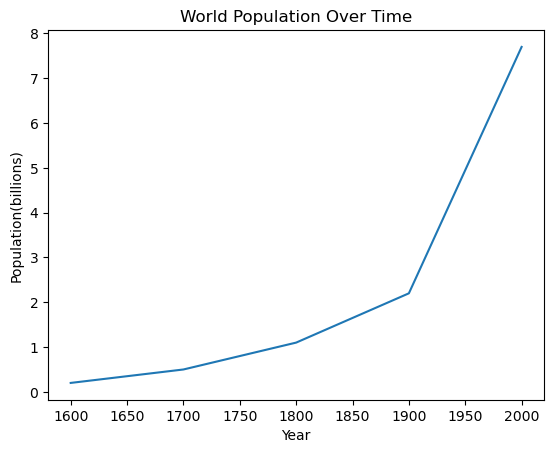

In [3]:
x,y = [1600,1700,1800,1900,2000],[0.2,0.5,1.1,2.2,7.7]
plt.plot(x,y) # creates the line
#Customizing our chart and its appearance
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population(billions)")
#displaying the chart
plt.show()

IN the above cell we start by creating our x and y coordinates for plotting.

The ***plot()*** method allows us to plot a single line; it only needs the coordinates passed in

To display the chart we use the ***show()*** method

#### Multiline plot

To plot many line we just need to simply apply as many plot() methods as necessary

Lets demonstrate by creating a line plot with multiple lines

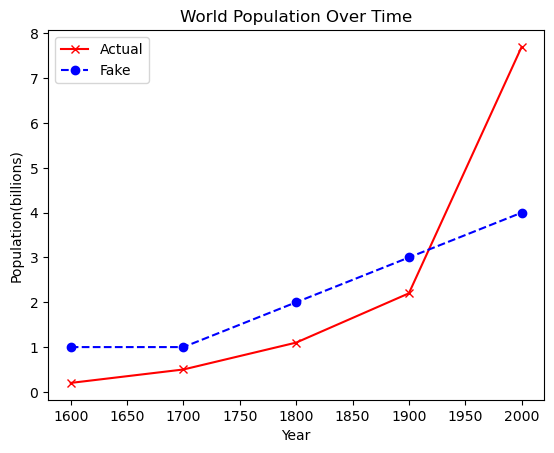

In [5]:
#creating a line plot with multiple lines
x1,y1 = [1600,1700,1800,1900,2000],[0.2,0.5,1.1,2.2,7.7]
x2,y2 = [1600,1700,1800,1900,2000],[1,1,2,3,4]
#next lets create a red solid line with x dots
plt.plot(x1,y1, "rx-",label="Actual")

#lets create the second line to be a blue dashed line with circle dots
plt.plot(x2,y2, "bo--",label = "Fake")

plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population(billions)")
plt.legend()#shows labels in the best corner
#displaying the chart
plt.show()

### Bar plot

This is much better when we need to plot categorical data

For example

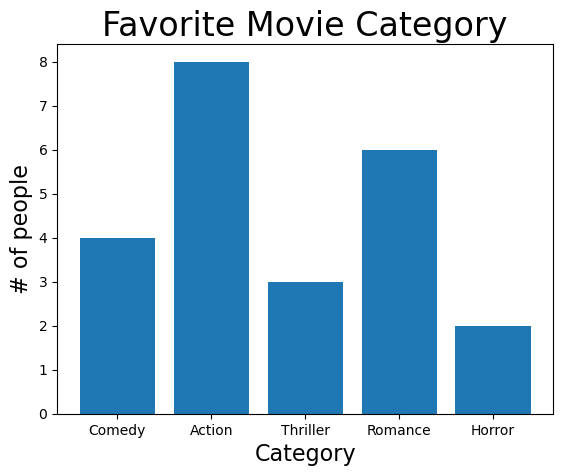

In [9]:
#creating a bar plot using x and y coords
num_people,categories = [4,8,3,6,2],["Comedy","Action","Thriller","Romance","Horror"]
plt.bar(categories,num_people)

plt.title("Favorite Movie Category",fontsize=24)
plt.xlabel("Category",fontsize=16)
plt.ylabel("# of people",fontsize=16)
#plt.xticks(fontname = "fantasy")
#plt.yticks(fontname = "fantasy")
plt.show()

### Box plot